In [841]:
# Importar librerías a utilizar
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset Vehicle
df_vehicle = pd.read_csv('car details v4.csv')

In [843]:
# tipo de datos que tiene cada columna
df_vehicle.dtypes


Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [845]:
#Verificamos si existen valores nulos
print(df_vehicle.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [847]:
# Eliminar columna current_year
df_vehicle = df_vehicle.drop(columns=['Engine'])

In [849]:
# Eliminar columna current_year
df_vehicle = df_vehicle.drop(columns=['Height'])
df_vehicle = df_vehicle.drop(columns=['Make'])
df_vehicle = df_vehicle.drop(columns=['Max Power'])
df_vehicle = df_vehicle.drop(columns=['Max Torque'])
df_vehicle = df_vehicle.drop(columns=['Drivetrain'])
df_vehicle = df_vehicle.drop(columns=['Length'])
df_vehicle = df_vehicle.drop(columns=['Width'])
df_vehicle = df_vehicle.drop(columns=['Seating Capacity'])
df_vehicle = df_vehicle.drop(columns=['Fuel Tank Capacity'])

In [851]:
df_vehicle.head()

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate
1,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual
2,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual
3,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual
4,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual


In [853]:
df_vehicle.describe()

,Price,Year,Kilometer
count,2.059000e+03,2059.000000,2.059000e+03
mean,1.702992e+06,2016.425449,5.422471e+04
std,2.419881e+06,3.363564,5.736172e+04
min,4.900000e+04,1988.000000,0.000000e+00
25%,4.849990e+05,2014.000000,2.900000e+04
50%,8.250000e+05,2017.000000,5.000000e+04
75%,1.925000e+06,2019.000000,7.200000e+04
max,3.500000e+07,2022.000000,2.000000e+06


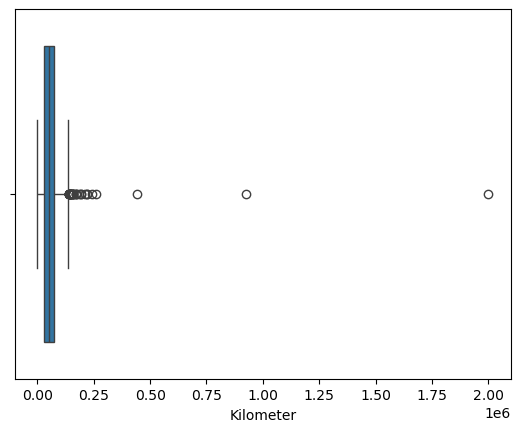

In [855]:
# Procedemos a identificar valores atipicos de la columna kilometer
sns.boxplot(x=df_vehicle['Kilometer'])
plt.show()

In [857]:
# Conteo de filas del dataset filtrado
df_vehicle.shape

(2059, 10)

In [859]:
# Transformación de las columnas categóricas

# Se verifican la cantidad de valores unicos en cada columna categórica
print(df_vehicle['Year'].nunique())
print(df_vehicle['Owner'].nunique())
print(df_vehicle['Color'].nunique())

22
6
17


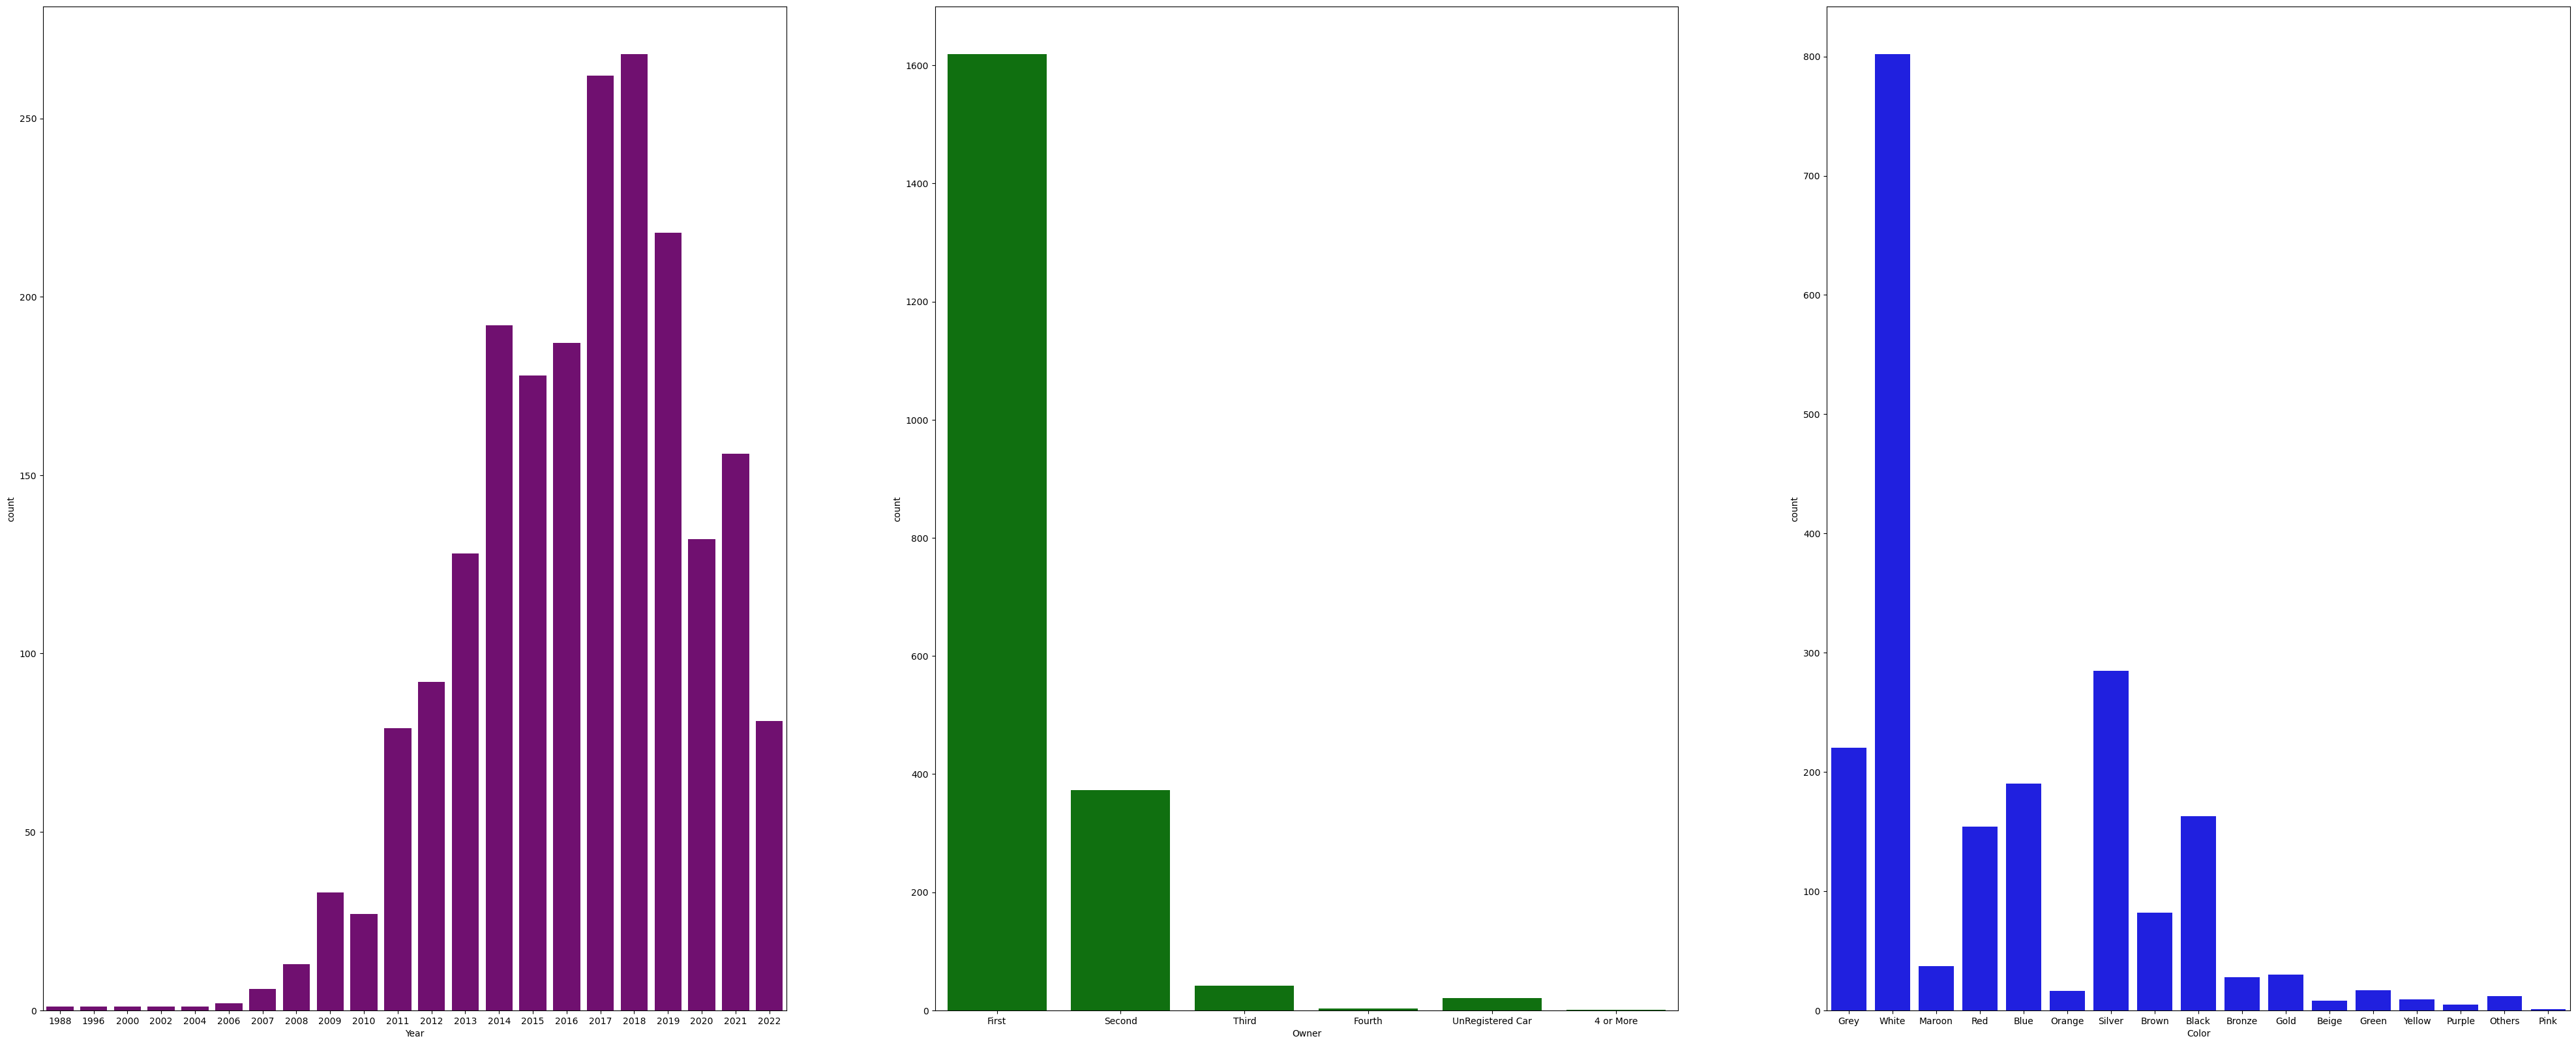

In [1078]:
plt.figure(figsize=(50, 20))

plt.subplot(1, 3, 1)
sns.countplot(x='Year', data=df_vehicle, color='purple')

plt.subplot(1, 3, 2)
sns.countplot(x='Owner', data=df_vehicle, color='green')

plt.subplot(1, 3, 3)
sns.countplot(x='Color', data=df_vehicle, color='blue')

plt.show()

In [1079]:
D1=df_vehicle.drop(columns='Year')


In [1080]:

# Codificación de la columna "seller_type"
D1 = D1.replace({"Fuel Type": {"Petrol": 0, "Diesel": 1, "CNG": 2, "CNG + CNG": 3, "Petrol + CNG":4, "LPG":5, "Electric":6, "Hybrid":6, "Petrol + LPG":7}})
D1 = D1.replace({"Transmission": {"Manual": 0, "Automatic": 1}})


/var/folders/p1/gxfc_nkd0rv0954787hc_hg00000gn/T/ipykernel_10858/3883599156.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D1 = D1.replace({"Fuel Type": {"Petrol": 0, "Diesel": 1, "CNG": 2, "CNG + CNG": 3, "Petrol + CNG":4, "LPG":5, "Electric":6, "Hybrid":6, "Petrol + LPG":7}})
/var/folders/p1/gxfc_nkd0rv0954787hc_hg00000gn/T/ipykernel_10858/3883599156.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D1 = D1.replace({"Transmission": {"Manual": 0, "Automatic": 1}})


In [1084]:
# Verificamos los cambios
D1.head()

,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,Amaze 1.2 VX i-VTEC,505000,87150,0,0,Pune,Grey,First,Corporate
1,Swift DZire VDI,450000,75000,1,0,Ludhiana,White,Second,Individual
2,i10 Magna 1.2 Kappa2,220000,67000,0,0,Lucknow,Maroon,First,Individual
3,Glanza G,799000,37500,0,0,Mangalore,Red,First,Individual
4,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,1,0,Mumbai,Grey,First,Individual


In [1086]:
D1 = D1.drop(columns=['Model'])
D1 = D1.drop(columns=['Location'])
D1 = D1.drop(columns=['Color'])
D1 = D1.drop(columns=['Owner'])
D1 = D1.drop(columns=['Seller Type'])




In [1151]:
D1.head()


,Price,Kilometer,Fuel Type,Transmission
0,505000,87150,0,0
1,450000,75000,1,0
2,220000,67000,0,0
3,799000,37500,0,0
4,1950000,69000,1,0


In [1153]:
# Varibles dependientes e independientes:
X = D1.drop(['Kilometer'], axis=1)
y = D1['Kilometer']

In [1157]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [1159]:
caler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [1161]:
# Creación de modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

LinearRegression()

In [1163]:
pred = modelo.predict(x_test)

In [1165]:
print("R2 score: ", (metrics.r2_score(pred, y_test))) # Coeficiente de determinación R²
print("MAE: ", (metrics.mean_absolute_error(pred, y_test))) # Error Absoluto Medio
print("MSE: ", (metrics.mean_squared_error(pred, y_test))) # Error Cuadrático Medio

R2 score:  -11.765145064979968
MAE:  23202.6832014506
MSE:  2008306829.8074346


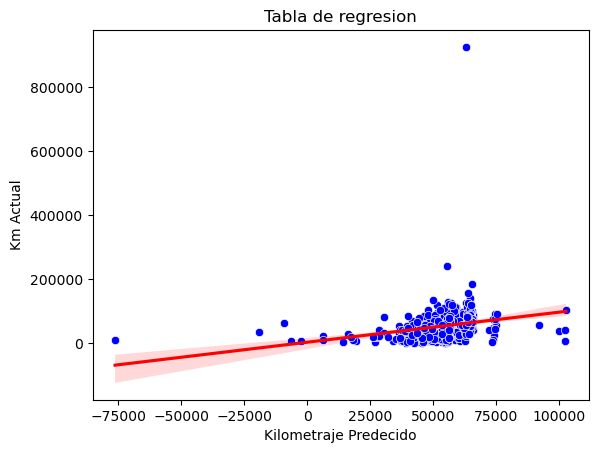

In [1169]:
sns.regplot(x=pred, y=y_test, color='red', scatter=False) # Linea de regresión (Datos predecidos)
sns.scatterplot(x=pred, y=y_test, color='blue') # Datos reales
plt.xlabel("Kilometraje Predecido")
plt.ylabel('Km Actual')
plt.title("Tabla de regresion")
plt.show()